In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [232]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [233]:
df.shape

(12330, 18)

In [234]:
df.duplicated().sum()

125

In [235]:
df = df.drop_duplicates()

In [236]:
df.shape

(12205, 18)

In [237]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [238]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [239]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12205,12205,12205,12205
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3329,10431,9346,10297


In [240]:
con = []
obj = []
for i in df.columns:
    print(i,df[i].nunique(),end=' ')
    if(df[i].nunique())>19:
        con.append(i)
    else:
        obj.append(i)

Administrative 27 Administrative_Duration 3335 Informational 17 Informational_Duration 1258 ProductRelated 311 ProductRelated_Duration 9551 BounceRates 1872 ExitRates 4777 PageValues 2704 SpecialDay 6 Month 10 OperatingSystems 8 Browser 13 Region 9 TrafficType 20 VisitorType 3 Weekend 2 Revenue 2 

In [241]:
print(con)
print(obj)

['Administrative', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'TrafficType']
['Informational', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue']


In [242]:
df[obj] = df[obj].astype(str)

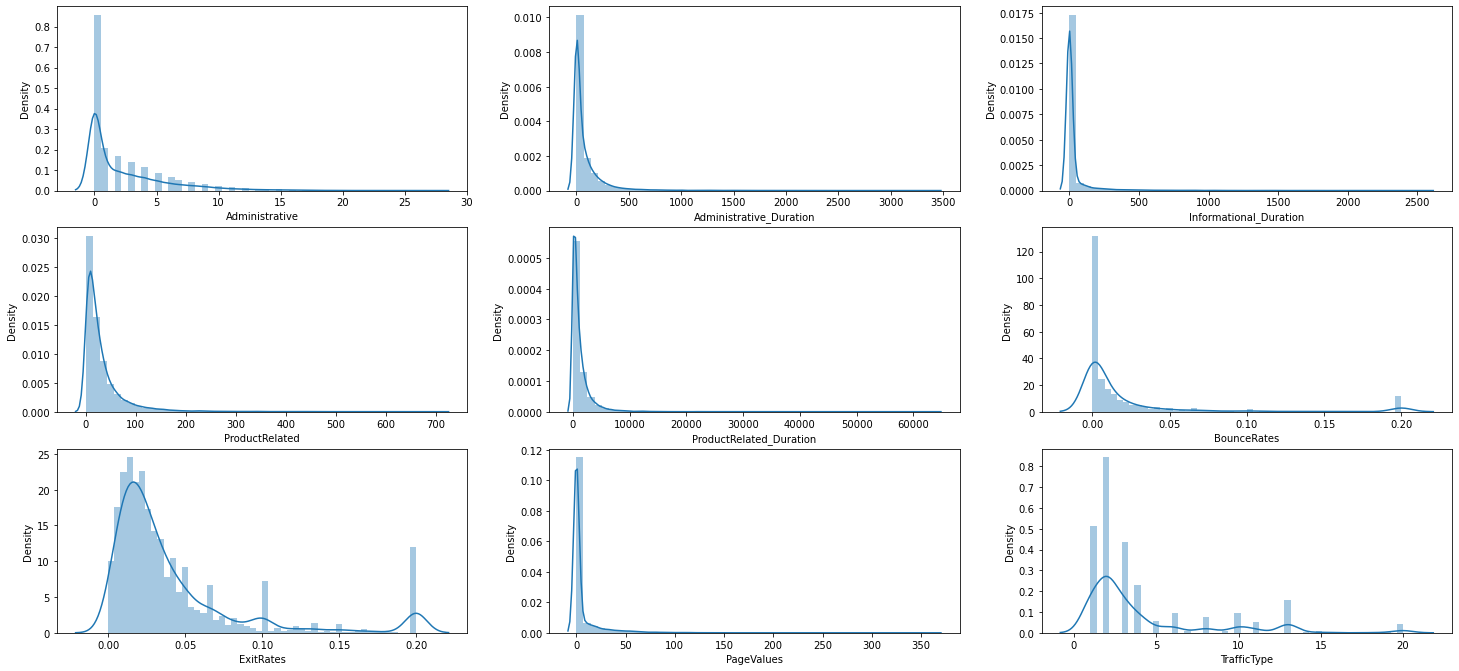

In [243]:
plt.figure(figsize=(25,40))
j=1
for i in df.select_dtypes(exclude=['object']):
    plt.subplot(10,3,j)
    sns.distplot(df[i])
    j=j+1

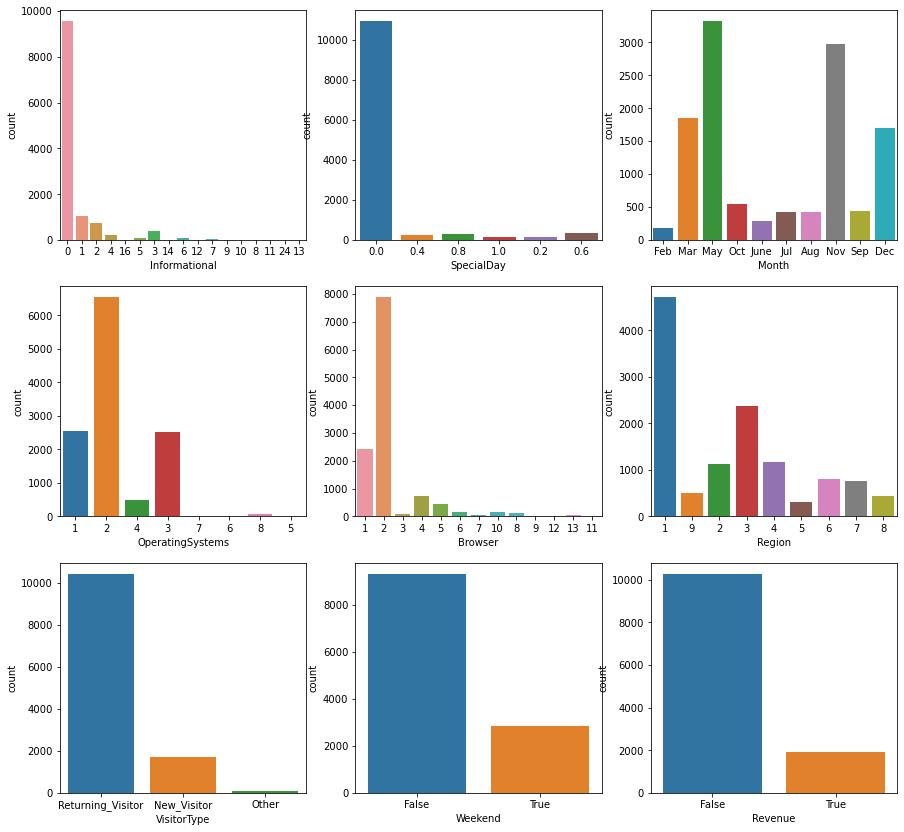

In [244]:
plt.figure(figsize=(15,50))
j=1
for i in df.select_dtypes(include=['object','bool']):
    plt.subplot(10,3,j)
    sns.countplot(df[i])
    j=j+1

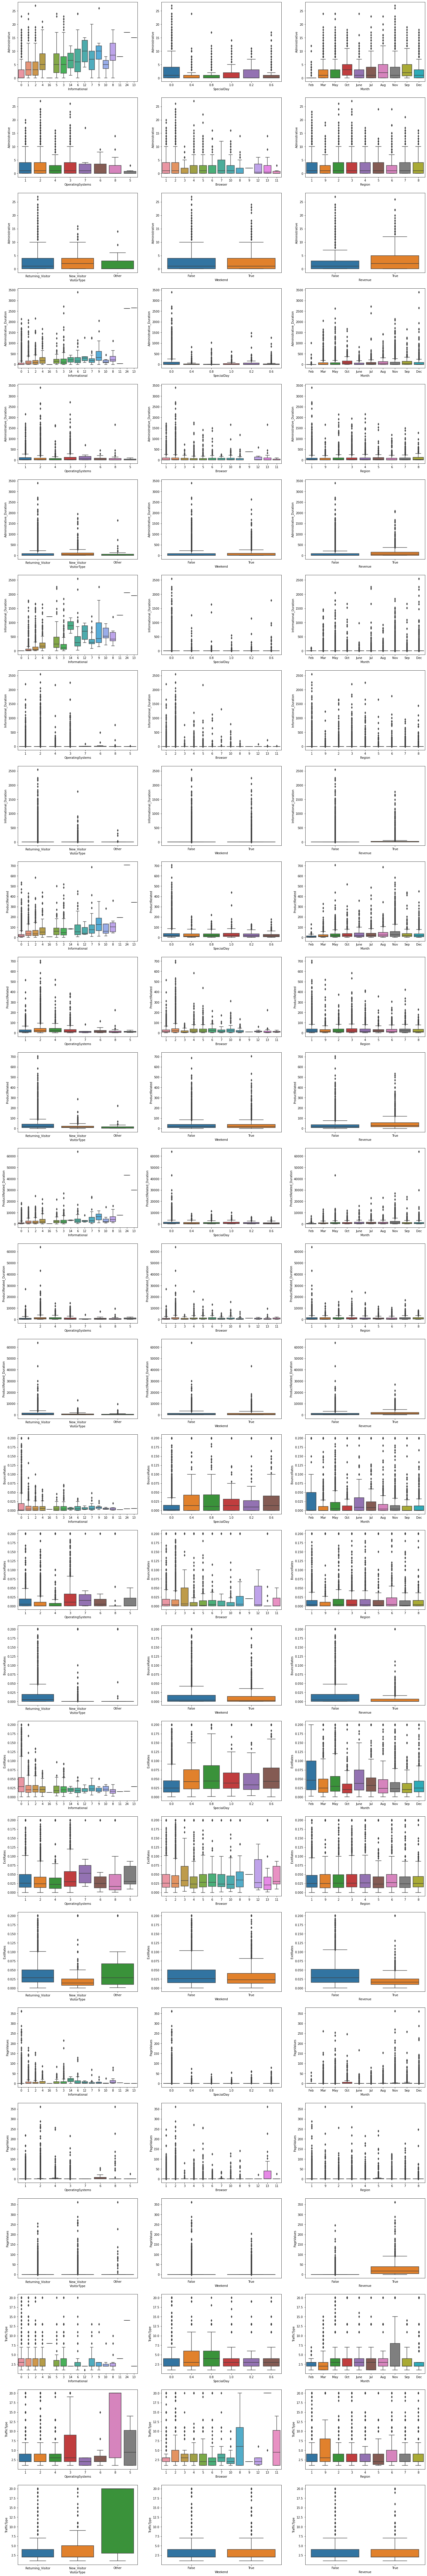

In [245]:
plt.figure(figsize=(25,300))
j=1
for k in con:
    for i in df.select_dtypes(include=['object','bool']):
        plt.subplot(50,3,j)
        sns.boxplot(x=df[i],y=df[k])
        j=j+1

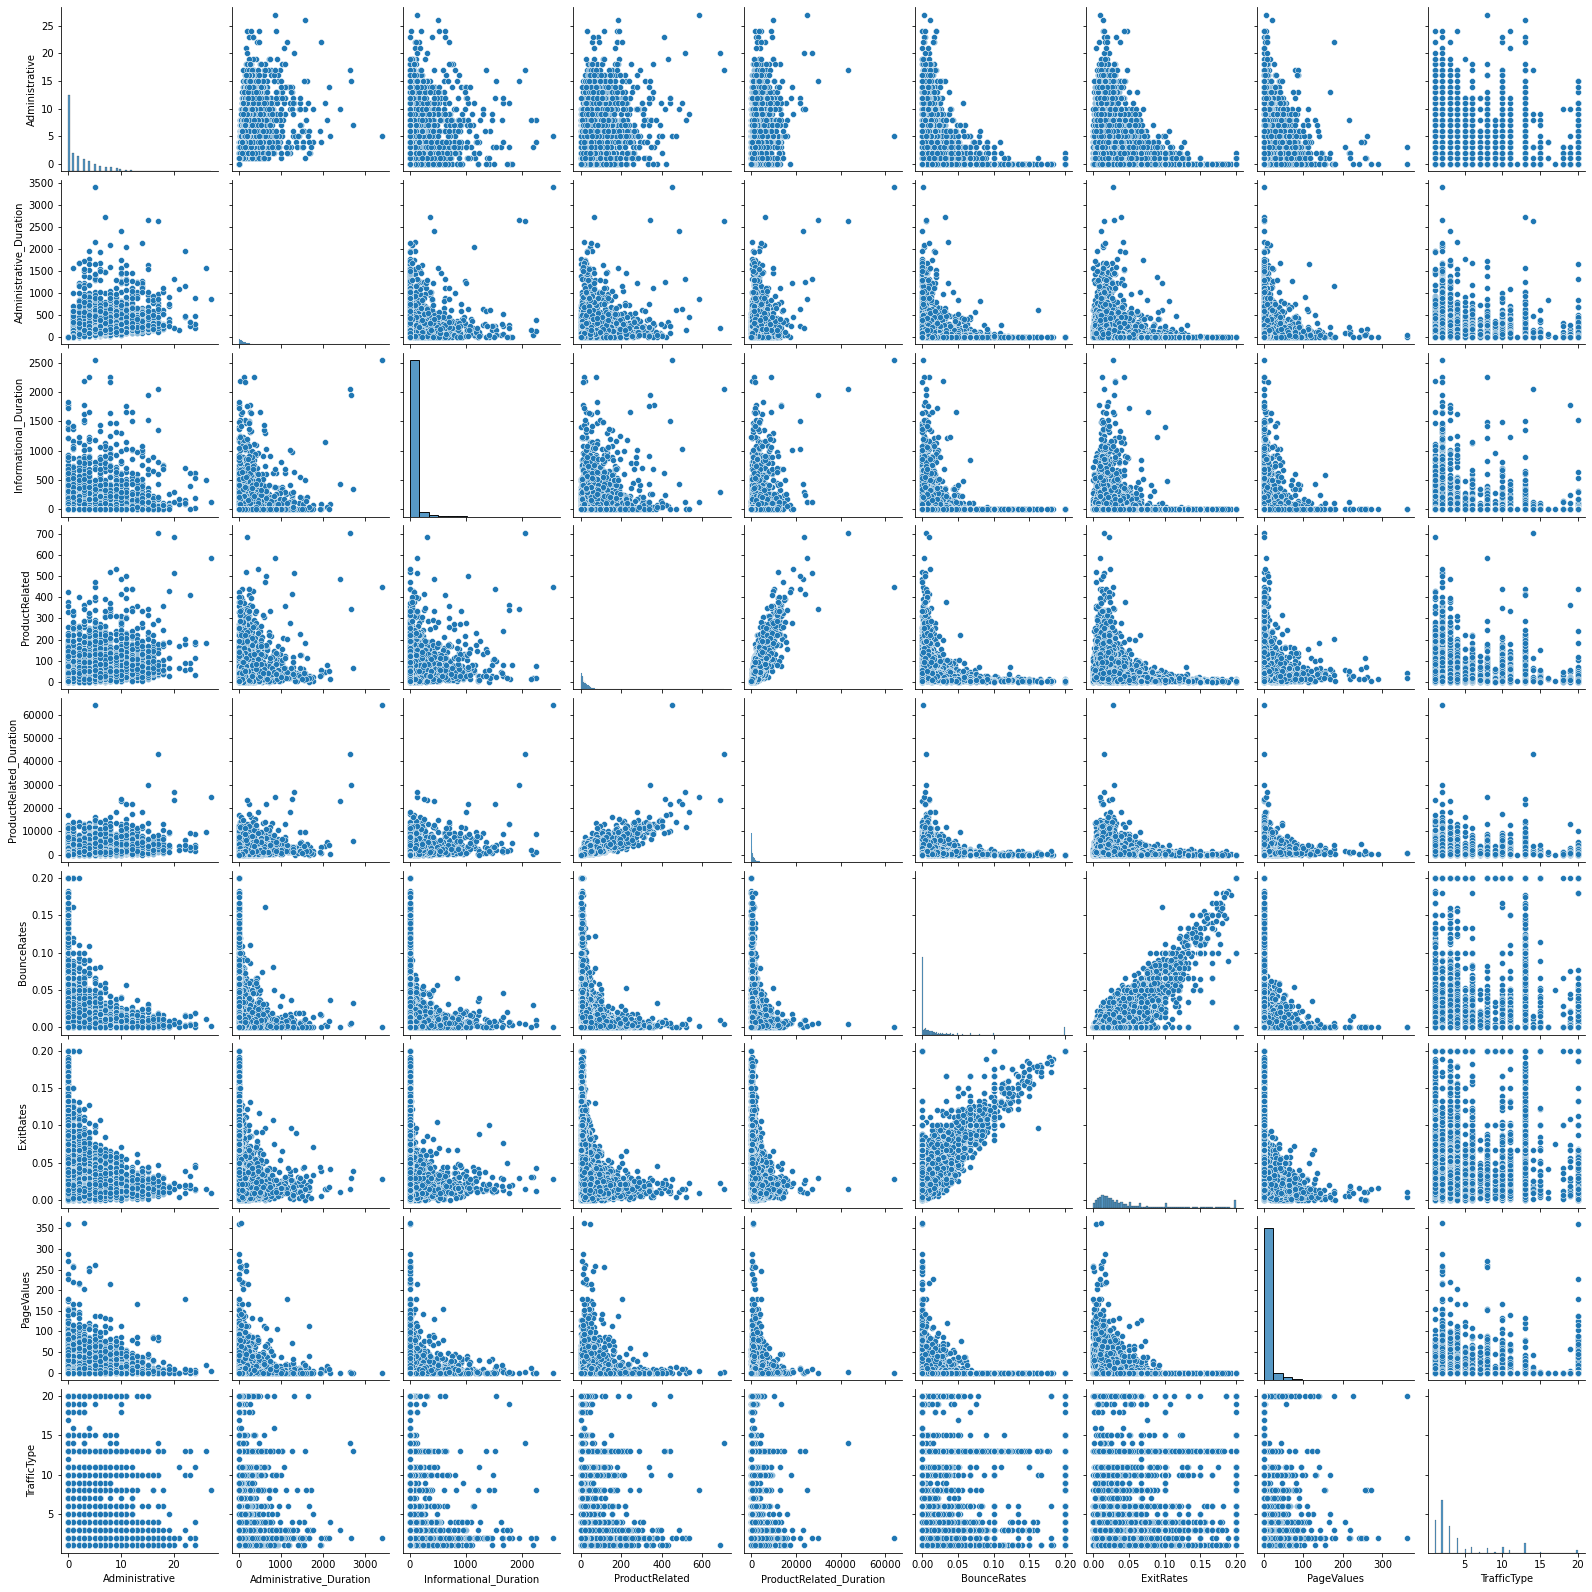

In [246]:
sns.pairplot(df)

<AxesSubplot:>

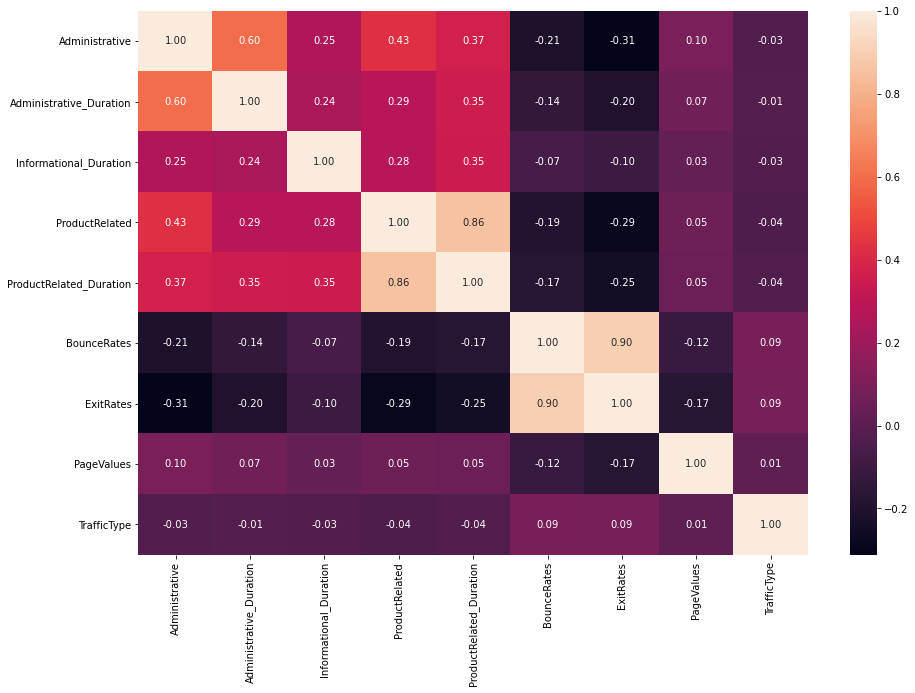

In [247]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

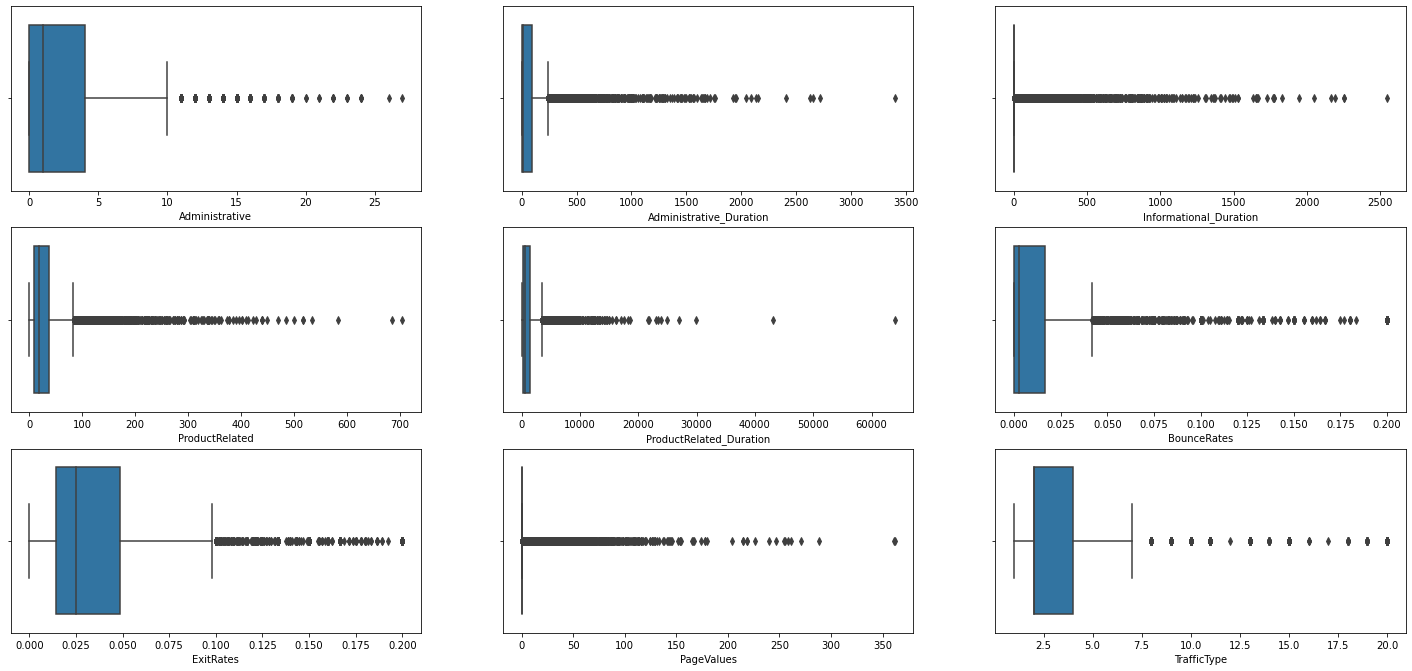

In [248]:
plt.figure(figsize=(25,40))
j=1
for i in df.select_dtypes(exclude=['object','bool']):
    plt.subplot(10,3,j)
    sns.boxplot(df[i])
    j=j+1

In [249]:
for i in df.select_dtypes(exclude=['object','bool']):
    df.loc[df[i]>df[i].quantile(0.95),i] = df[i].quantile(0.95)
    df.loc[df[i]<df[i].quantile(0.05),i] = df[i].quantile(0.05)

In [250]:
for i in df.select_dtypes(exclude=['object','bool']):
    df[i] = np.sqrt(df[i])

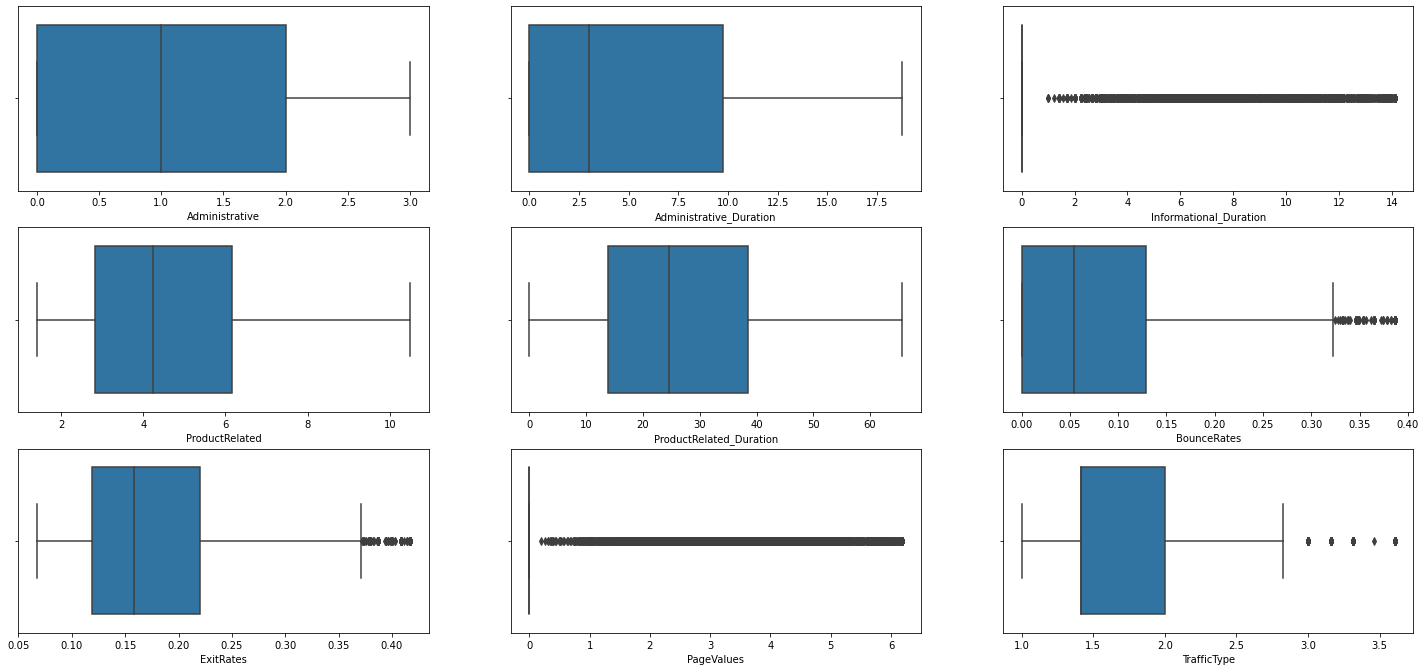

In [251]:
plt.figure(figsize=(25,40))
j=1
for i in df.select_dtypes(exclude=['object','bool']):
    plt.subplot(10,3,j)
    sns.boxplot(df[i])
    j=j+1

In [252]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[con] = scaler.fit_transform(df[con])

In [253]:
df = pd.get_dummies(df,columns=['VisitorType','Weekend'])

In [256]:
print(obj)

['Informational', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue']


In [258]:
del df['Month']

In [261]:
df[[i for i in obj if i not in ['VisitorType', 'Weekend','Month','Revenue']]] = df[[i for i in obj if i not in ['VisitorType', 'Weekend','Month','Revenue']]].astype(float)

In [262]:
x = df[[i for i in df.columns if i!='Revenue']]

In [263]:
x.shape

(12205, 19)

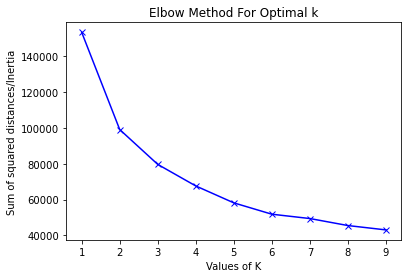

In [264]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

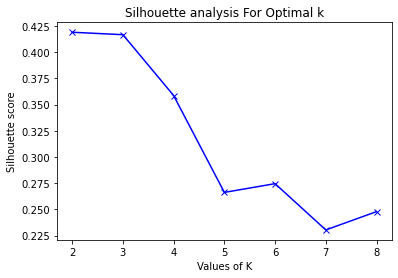

In [265]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(x, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [266]:
# optimal k is 2

In [267]:
df1 = df.copy()

In [268]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
df1['kmeans'] = kmeans.labels_


In [270]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(x)


df1['agglomerative'] = clustering.labels_

In [ ]:
# Comparison

In [276]:
df1['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [275]:
df1['kmeans'].value_counts()

0    9370
1    2835
Name: kmeans, dtype: int64

In [274]:
df1.groupby('kmeans')[con].mean()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType
kmeans,,,,,,,,,
0,0.340954,0.282562,0.128077,0.369158,0.419777,0.216388,0.324651,0.147748,0.314885
1,0.335801,0.283998,0.114183,0.350123,0.408001,0.206792,0.318108,0.145265,0.320702


In [277]:
# agglomerative

In [278]:
df1['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [279]:
df1['agglomerative'].value_counts()

0    9531
1    2674
Name: agglomerative, dtype: int64

In [280]:
df1.groupby('agglomerative')[con].mean()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType
agglomerative,,,,,,,,,
0,0.342216,0.283887,0.129577,0.369740,0.420336,0.216577,0.324155,0.149227,0.313527
1,0.330993,0.279360,0.108000,0.346901,0.405299,0.205541,0.319480,0.139846,0.325891


In [ ]:
# PCA

In [297]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x)

print(pca.explained_variance_ratio_)

[0.46372217 0.23268611 0.13777317 0.06143269 0.02875829 0.02270185
 0.01803808 0.00848201 0.00693332 0.00611522]


In [298]:
x1 = pca.fit_transform(x)

In [309]:
x1 = pd.DataFrame(x1)[[0,1,2,3]]

In [310]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(x1)
df1['kmeans_pca'] = kmeans.labels_

In [311]:
df1['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [312]:
df1['kmeans_pca'].value_counts()

1    9370
0    2835
Name: kmeans_pca, dtype: int64

In [313]:
df1.groupby('kmeans_pca')[con].mean()

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType
kmeans_pca,,,,,,,,,
0,0.335801,0.283998,0.114183,0.350123,0.408001,0.206792,0.318108,0.145265,0.320702
1,0.340954,0.282562,0.128077,0.369158,0.419777,0.216388,0.324651,0.147748,0.314885


In [ ]:
# we can able to get the best clusters with 4 principal components